# App dataset with decision trees

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 153 (delta 66), reused 124 (delta 37), pack-reused 0
Receiving objects: 100% (153/153), 33.98 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (66/66), done.
/content/machine_learning_1/decision_trees


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import random
random.seed(0)

In [3]:
app_dataset = pd.DataFrame({
    'Gender': ['Female','Female','Male','Female','Male','Male'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
app_dataset

,Gender,Age,App
0,Female,15,Snapchat
1,Female,25,SheIn
2,Male,32,Fantasy PL
3,Female,35,SheIn
4,Male,12,Snapchat
5,Male,14,Snapchat


# With age as a categorical feature

In [4]:
app_dataset_one_hot = pd.DataFrame(
    {'Gender_Female':[1,1,0,1,0,0],
     'Gender_Male':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Old':[0,1,1,1,0,0],
     'App_Snapchat':[1,0,0,0,1,1],
     'App_Fantasy_PL':[0,0,1,0,0,0],
     'App_SheIn':[0,1,0,1,0,0]})
app_dataset_one_hot

,Gender_Female,Gender_Male,Age_Young,Age_Old,App_Snapchat,App_Fantasy_PL,App_SheIn
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [5]:
X = app_dataset_one_hot[['Gender_Female','Gender_Male','Age_Old','Age_Young']]
y = app_dataset_one_hot[['App_Snapchat','App_Fantasy_PL','App_SheIn']]

In [7]:
from sklearn.tree import DecisionTreeClassifier
## TODO ##
# Train a Decision Tree Classifier and print score
dt = DecisionTreeClassifier().fit(X,y)



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


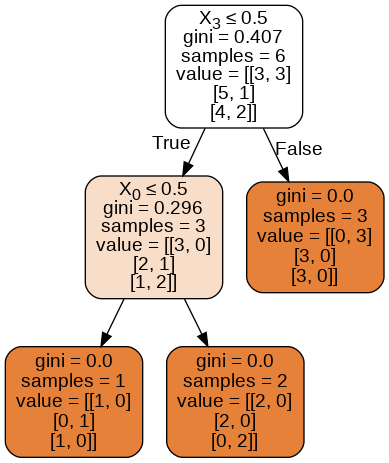

In [8]:
utils.display_tree(dt)

# With age as a numerical feature

In [9]:
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
print(app_dataset)

   Gender_Female  Gender_Male  Age         App
0              1            0   15    Snapchat
1              1            0   25       SheIn
2              0            1   32  Fantasy PL
3              1            0   35       SheIn
4              0            1   12    Snapchat
5              0            1   14    Snapchat


In [10]:
features = app_dataset[['Age','Gender_Female','Gender_Male']]
print(features)

   Age  Gender_Female  Gender_Male
0   15              1            0
1   25              1            0
2   32              0            1
3   35              1            0
4   12              0            1
5   14              0            1


In [11]:
labels = app_dataset['App']
print(labels)

0      Snapchat
1         SheIn
2    Fantasy PL
3         SheIn
4      Snapchat
5      Snapchat
Name: App, dtype: object


In [13]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

In [15]:
## TODO ##
# predict
print(app_model.predict([[13, 1, 0]]))

# A woman aged 28
print(app_model.predict([[28, 1, 0]]))
# A man aged 34
print(app_model.predict([[34, 0, 1]]))

['Snapchat']
['SheIn']
['Fantasy PL']


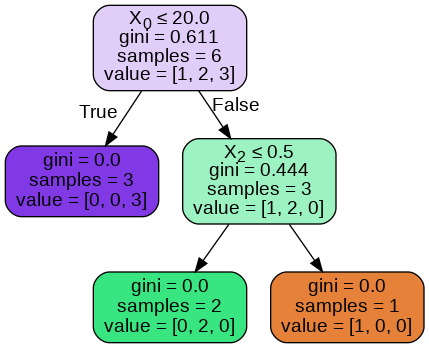

In [16]:
utils.display_tree(app_model)

# Decision trees for regression

In [17]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,6,0,1,0,4,3]

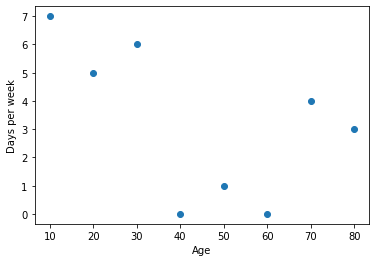

In [18]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [19]:
# use Decision Tree for Regreesion to fit tha data
# use depth = 2
dt_regressor = DecisionTreeRegressor().fit(features, labels)

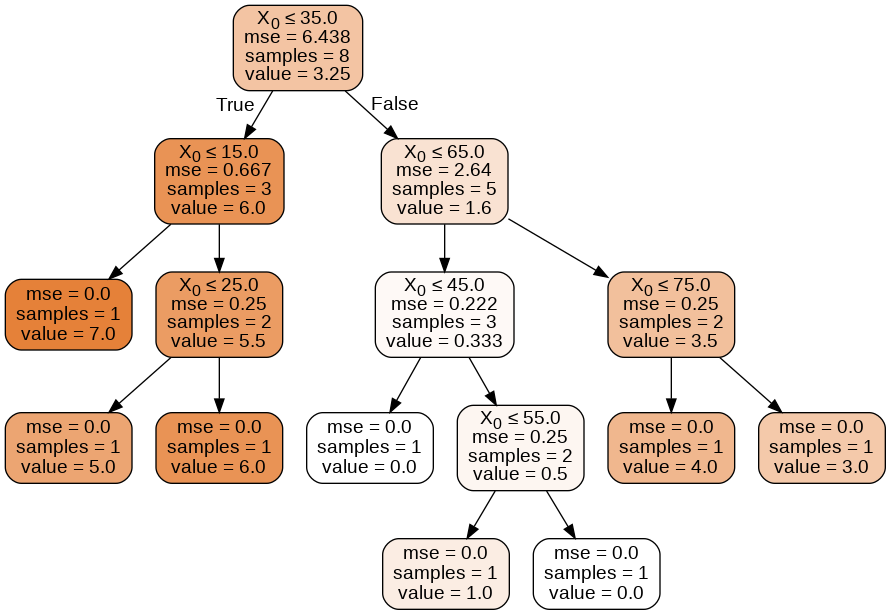

In [20]:
utils.display_tree(dt_regressor)

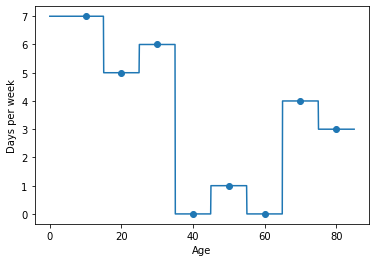

In [21]:
utils.plot_regressor(dt_regressor, features, labels)